In [1]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/82/5a5eee685095a6c1f8968db75bba8536baa8046c970be25e1ac91a843839/yfinance-0.2.33-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/b6/2c/e391d6d57bbd837d383a6b69b54ecb4768d75b31d8bc7a380b4b4afe4cb2/frozendict-2.3.10-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     ------- -------------------------------- 0.6/2.9 MB 12.0 MB/s eta 0:00:01
     ------------------------------------ --- 2.7/2.9 MB 28.2 MB/s eta 0:00:01
     ---------------------------------------- 2.9/2.9 MB 26.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparin

In [2]:
import yfinance as yf
import os
import pandas as pd

In [3]:
btc_ticker=yf.Ticker("BTC-USD")

In [4]:
btc=btc_ticker.history(period="max")

In [5]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-21 00:00:00+00:00,43648.125000,44240.667969,43330.050781,43869.152344,22452766169,0.0,0.0
2023-12-22 00:00:00+00:00,43868.988281,44367.957031,43441.968750,43997.902344,21028503216,0.0,0.0
2023-12-23 00:00:00+00:00,44012.199219,44015.699219,43351.355469,43739.542969,13507796558,0.0,0.0


In [6]:
btc.index=pd.to_datetime(btc.index)

In [7]:
del btc["Dividends"]
del btc["Stock Splits"]

In [8]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

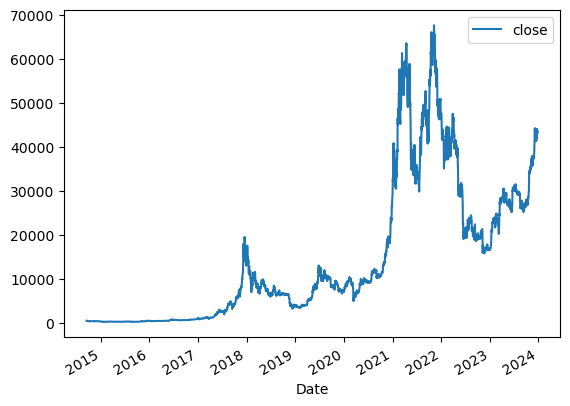

In [9]:
btc.plot.line(y="close", use_index=True)

In [10]:
wiki=pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [11]:
wiki

,edit_count,sentiment,neg_+sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-12-21,9.433333,-0.163431,0.276473
2023-12-22,6.466667,-0.196951,0.294251
2023-12-23,4.466667,-0.152213,0.271847
2023-12-24,1.500000,-0.148118,0.253869


In [14]:
#Merge data from Wiki and Yahoo 
wiki.index = wiki.index.tz_localize(None)

In [16]:
btc.index = btc.index.tz_localize(None)

In [17]:
btc_timezone = btc.index.tz

In [19]:
wiki.index = wiki.index.tz_localize(btc_timezone)

In [20]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [21]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_+sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2023-12-20,42261.300781,44275.585938,42223.816406,43652.250000,27868908174,12.666667,-0.164269,0.292624
2023-12-21,43648.125000,44240.667969,43330.050781,43869.152344,22452766169,9.433333,-0.163431,0.276473
2023-12-22,43868.988281,44367.957031,43441.968750,43997.902344,21028503216,6.466667,-0.196951,0.294251
2023-12-23,44012.199219,44015.699219,43351.355469,43739.542969,13507796558,4.466667,-0.152213,0.271847


In [22]:
#Next day close value named under"tomorrow" for predict.
btc["tomorrow"]=btc["close"].shift(-1)

In [23]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_+sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2023-12-20,42261.300781,44275.585938,42223.816406,43652.250000,27868908174,12.666667,-0.164269,0.292624,43869.152344
2023-12-21,43648.125000,44240.667969,43330.050781,43869.152344,22452766169,9.433333,-0.163431,0.276473,43997.902344
2023-12-22,43868.988281,44367.957031,43441.968750,43997.902344,21028503216,6.466667,-0.196951,0.294251,43739.542969
2023-12-23,44012.199219,44015.699219,43351.355469,43739.542969,13507796558,4.466667,-0.152213,0.271847,43016.117188


In [25]:
btc["target"]=(btc["tomorrow"]>btc["close"]).astype(int)

In [26]:
btc["target"].value_counts()

target
1    1792
0    1594
Name: count, dtype: int64

In [31]:
#Training Our Baseline ML Model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
train=btc.iloc[:-200]
test=btc[-200:]
predictors=["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_+sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [32]:
from sklearn.metrics import precision_score

preds= model.predict(test[predictors])
preds=pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.4375

In [33]:
#Evaluating Error w/ Backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds= model.predict(test[predictors])
    preds=pd.Series(preds, index=test.index, name="predictions")
    combined=pd.concat([test["target"], preds], axis=1)
    return combined

In [35]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions=[]
    
    for i in range(start, data.shape[0], step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train, test, predictors, model)
        all_predictions. append(predictions)
        
    return pd.concat(all_predictions)

In [37]:
#Using An Xgboost Model
!pip install xgboost

from xgboost import XGBClassifier
model=XGBClassifier(random_state=1, learning_rate=.1, n_3stimators=200)
predictions=backtest(btc, model, predictors)

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 1.0/99.8 MB 8.8 MB/s eta 0:00:12
    --------------------------------------- 2.0/99.8 MB 12.5 MB/s eta 0:00:08
   - -------------------------------------- 3.6/99.8 MB 17.5 MB/s eta 0:00:06
   -- ------------------------------------- 5.7/99.8 MB 22.9 MB/s eta 0:00:05
   --- ------------------------------------ 8.2/99.8 MB 27.4 MB/s eta 0:00:04
   --- ------------------------------------ 9.5/99.8 MB 27.6 MB/s eta 0:00:04
   ---- ----------------------------------- 11.9/99.8 MB 43.7 MB/s eta 0:00:03
   ----- -----------------------

C:\Users\barbi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_3stimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\barbi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_3stimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\barbi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_3stimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\barbi\anaconda3\Lib\site-packages\xgboost\core.py

In [38]:
precision_score(predictions["target"], predictions["predictions"])

0.5028612303290415

In [51]:
#Improving Prevision w/ Trends
def compute_rolling(btc):
    horizons=[2,7,60,365]
    new_predictors=["close", "sentiment", "neg_+sentiment"]
    
    for horizon in horizons:
        rolling_averages=btc.rolling(horizon, min_periods=1).mean()
        
        ratio_column=f"close_ratio_{horizon}"
        btc[ratio_column]=btc["close"]/rolling_averages["close"]
        
        edit_column=f"edit_{horizon}"
        btc[edit_column]=rolling_averages["edit_count"]
        
        rolling=btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column=f"trend_{horizon}"
        btc[trend_column]=rolling["target"]
        
        new_predictors += [ratio_column, trend_column, edit_column]
    return btc, new_predictors
btc, new_predictors = compute_rolling(btc.copy())
btc

,open,high,low,close,volume,edit_count,sentiment,neg_+sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,42261.300781,44275.585938,42223.816406,43652.250000,27868908174,12.666667,-0.164269,0.292624,43869.152344,1,...,0.5,1.028478,16.580952,0.571429,1.148321,8.716111,0.583333,1.555286,1.908128,0.493151
2023-12-21,43648.125000,44240.667969,43330.050781,43869.152344,22452766169,9.433333,-0.163431,0.276473,43997.902344,1,...,1.0,1.030656,15.442857,0.571429,1.147049,8.862778,0.583333,1.558897,1.933151,0.495890
2023-12-22,43868.988281,44367.957031,43441.968750,43997.902344,21028503216,6.466667,-0.196951,0.294251,43739.542969,0,...,1.0,1.026556,13.880952,0.714286,1.144971,8.959444,0.583333,1.559348,1.950046,0.495890
2023-12-23,44012.199219,44015.699219,43351.355469,43739.542969,13507796558,4.466667,-0.152213,0.271847,43016.117188,0,...,0.5,1.015453,12.033333,0.571429,1.133411,9.021667,0.566667,1.546146,1.961461,0.495890


In [54]:
predictions=backtest(btc, model, new_predictors)
precision_score(predictions["target"], predictions["predictions"])

C:\Users\barbi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_3stimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\barbi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_3stimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\barbi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_3stimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\barbi\anaconda3\Lib\site-packages\xgboost\core.py

0.5393068469991547

In [56]:
#0.5393 , 54% chance to be right
#Generating Future Predictions
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2023-12-20,1,1
2023-12-21,1,0
2023-12-22,0,0
2023-12-23,0,1


In [ ]:
# Improve The Model
